### OpenAI API 사용하기
- ChatGPT + Dall-E 사용하여 이미지 생성하기
- openai 패키지 설치(pip install openai)

In [1]:
import openai
from urllib.parse import quote
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
with open('../static/keys/openAIapikey.txt') as f:
    openai.api_key = f.read()

In [62]:
gpt_prompt = [
    {'role': 'system', 'content': 'Translate it in English'},
    {'role': 'user', 'content': '무서운 공룡'}      
]

In [63]:
chatgpt_response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo', messages=gpt_prompt
)
translated_prompt = chatgpt_response['choices'][0]['message']['content']
translated_prompt

'Scary dinosaur'

In [54]:
gpt_prompt = [
    {'role': 'system', 'content': 'Imagine the detail appearance of the input. Response it shortly around 20 words.'},
    {'role': 'user', 'content': translated_prompt}      
]

In [67]:
chatgpt_response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo', messages=gpt_prompt
)
prompt = chatgpt_response['choices'][0]['message']['content']
prompt

'Scary Dinosaur.'

In [64]:
dalle_response = openai.Image.create(
    prompt=translated_prompt, size='1024x1024'         # '1024x1024', '512x512', '256x256'
)

In [65]:
img_url = dalle_response['data'][0]['url']
response = requests.get(img_url)
img_file = open('down.png', 'wb')
img_file.write(response.content)
img_file.close()

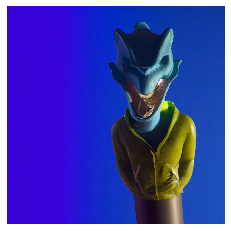

In [66]:
img = Image.open('down.png')
plt.imshow(img)
plt.axis('off')
plt.show()